# Experiment 3
---

In [14]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

file_path = 'Iris.csv'

df = pd.read_csv(file_path)

df_head = df.head()
df_shape = df.shape
df_head, df_shape

(   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
 0   1            5.1           3.5            1.4           0.2  Iris-setosa
 1   2            4.9           3.0            1.4           0.2  Iris-setosa
 2   3            4.7           3.2            1.3           0.2  Iris-setosa
 3   4            4.6           3.1            1.5           0.2  Iris-setosa
 4   5            5.0           3.6            1.4           0.2  Iris-setosa,
 (150, 6))

In [18]:
df_info = df.dtypes
df_info

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [19]:
df_no_id = df.drop(columns=['Id'])
summary_stats = df_no_id.describe()
summary_stats

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


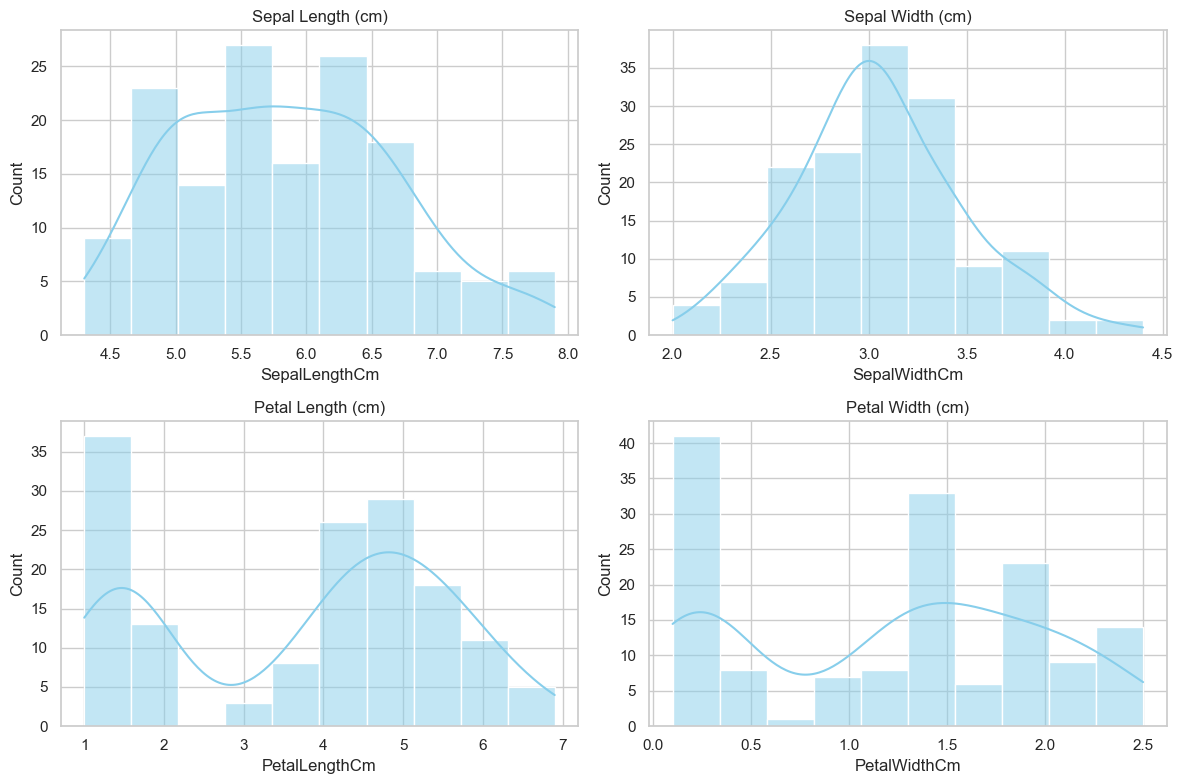

In [20]:
sns.set(style="whitegrid")

df_numeric = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

titles = ['Sepal Length (cm)', 'Sepal Width (cm)', 'Petal Length (cm)', 'Petal Width (cm)']

for i, col in enumerate(df_numeric.columns):
    ax = axs[i // 2, i % 2]
    sns.histplot(df[col], kde=True, bins=10, ax=ax, color='skyblue')
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()

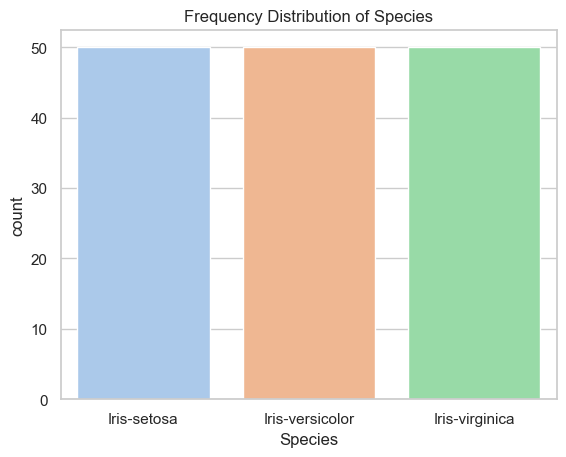

In [3]:
sns.countplot(x='Species', data=df, hue='Species', palette='pastel', legend=False)
plt.title('Frequency Distribution of Species')
plt.show()

In [4]:
missing_values = df.isnull().sum()
df_cleaned = df.dropna()
df['SepalLengthCm'] = df['SepalLengthCm'].fillna(df['SepalLengthCm'].mean())
print(missing_values)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [24]:
df_encoded = pd.get_dummies(df, columns=['Species'], drop_first=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species_Label'] = le.fit_transform(df['Species'])
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] = scaler.fit_transform(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

normalizer = MinMaxScaler()
df_normalized = df.copy()
df_normalized[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] = normalizer.fit_transform(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

print(df_normalized)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1       0.222222      0.625000       0.067797      0.041667   
1      2       0.166667      0.416667       0.067797      0.041667   
2      3       0.111111      0.500000       0.050847      0.041667   
3      4       0.083333      0.458333       0.084746      0.041667   
4      5       0.194444      0.666667       0.067797      0.041667   
..   ...            ...           ...            ...           ...   
145  146       0.666667      0.416667       0.711864      0.916667   
146  147       0.555556      0.208333       0.677966      0.750000   
147  148       0.611111      0.416667       0.711864      0.791667   
148  149       0.527778      0.583333       0.745763      0.916667   
149  150       0.444444      0.416667       0.694915      0.708333   

            Species  Species_Label  
0       Iris-setosa              0  
1       Iris-setosa              0  
2       Iris-setosa              0  
3       Iri

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Species'])
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
22    23            4.6           3.6            1.0           0.2   
15    16            5.7           4.4            1.5           0.4   
65    66            6.7           3.1            4.4           1.4   
11    12            4.8           3.4            1.6           0.2   
42    43            4.4           3.2            1.3           0.2   
..   ...            ...           ...            ...           ...   
71    72            6.1           2.8            4.0           1.3   
106  107            4.9           2.5            4.5           1.7   
14    15            5.8           4.0            1.2           0.2   
92    93            5.8           2.6            4.0           1.2   
102  103            7.1           3.0            5.9           2.1   

     Species_Label  
22               0  
15               0  
65               1  
11               0  
42               0  
..             ...  
71          